### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

####    S1-> item1 -> quantity_sales

 ####   S1-> item2 -> quantity_sales

####    S1-> item3 -> quantity_sales

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [34]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  it.supplier, it.item_name, SUM(t.quantity) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"GROUP BY CUBE(it.supplier, it.item_name) "\
"ORDER BY it.supplier, SUM(t.quantity) DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Supplier', 'ItemName', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
# df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Supplier,ItemName,Sales
0,BIGSO AB,None,592105.0
1,BIGSO AB,Nat.Valley PeanutButter Protein Bars,23958.0
2,BIGSO AB,100% Juice Box Variety 6.75 oz,23425.0
3,BIGSO AB,Red Bull Sugar Free 8.4 oz,23343.0
4,BIGSO AB,Red Bull 8.4 oz,23231.0
...,...,...,...
529,None,Dole Fruit in Gel Cups 4.3 oz,21818.0
530,None,La Croix Sparkling Orange 12 oz,21817.0
531,None,Hershey Factory Favorites Mix,21741.0
532,None,Monster Java 15 oz,21698.0


In [35]:
df = df.dropna()
df

,Supplier,ItemName,Sales
1,BIGSO AB,Nat.Valley PeanutButter Protein Bars,23958.0
2,BIGSO AB,100% Juice Box Variety 6.75 oz,23425.0
3,BIGSO AB,Red Bull Sugar Free 8.4 oz,23343.0
4,BIGSO AB,Red Bull 8.4 oz,23231.0
5,BIGSO AB,Advil 2 pill packets,23126.0
...,...,...,...
269,NINGBO SEDUNO IMP & EXP CO.LTD,Welch's 100% Juice Variety10 oz,22458.0
270,NINGBO SEDUNO IMP & EXP CO.LTD,Nestle Purelife 16oz,22380.0
271,NINGBO SEDUNO IMP & EXP CO.LTD,Gatorade X-Factor Fierce Variety 20 oz,21949.0
272,NINGBO SEDUNO IMP & EXP CO.LTD,Hefty Cmprtmnt Plates Foam 10',21945.0


Text(0, 0.5, 'Total Sales in each month')

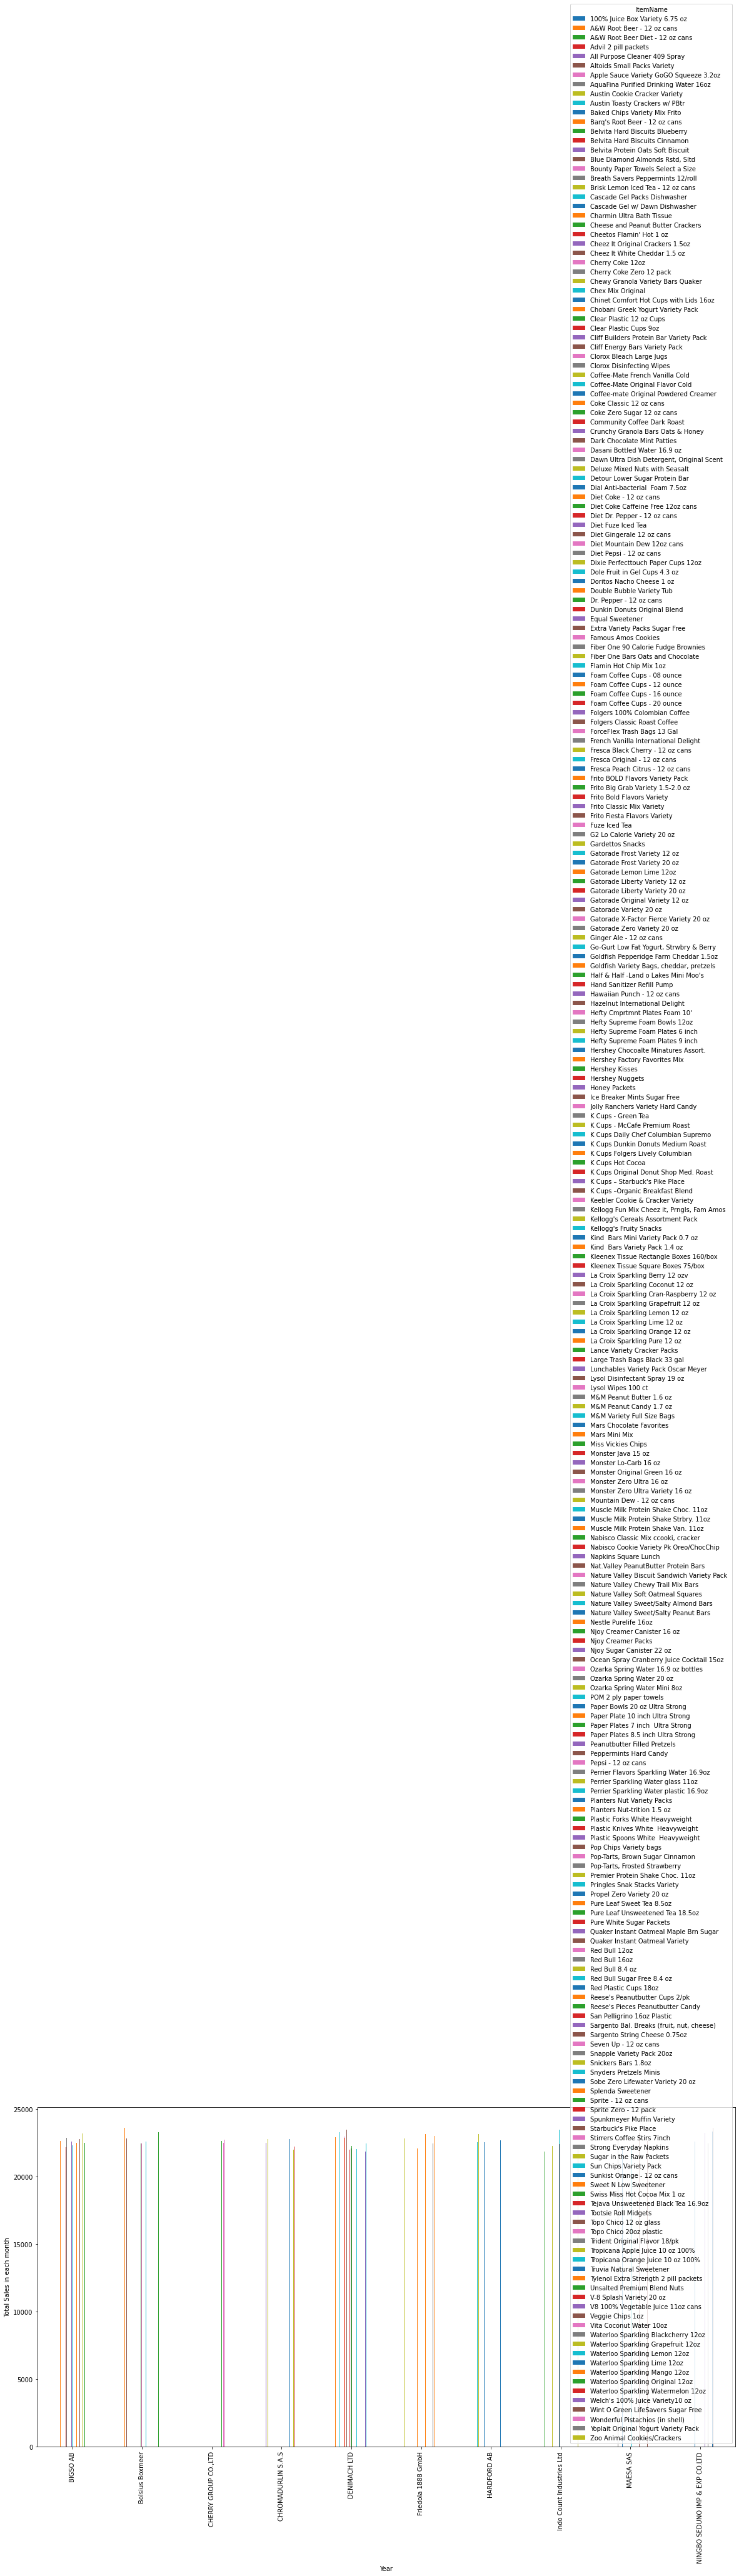

In [36]:
df_pivot = pd.pivot_table(df, values="Sales", index="Supplier", columns="ItemName")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 10)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each month")


In [37]:
df = df.groupby('Supplier').head(3)
df

,Supplier,ItemName,Sales
1,BIGSO AB,Nat.Valley PeanutButter Protein Bars,23958.0
2,BIGSO AB,100% Juice Box Variety 6.75 oz,23425.0
3,BIGSO AB,Red Bull Sugar Free 8.4 oz,23343.0
28,Bolsius Boxmeer,A&W Root Beer - 12 oz cans,23623.0
29,Bolsius Boxmeer,Waterloo Sparkling Original 12oz,23289.0
30,Bolsius Boxmeer,Reese's Pieces Peanutbutter Candy,23273.0
55,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),23454.0
56,"CHERRY GROUP CO.,LTD",Clorox Bleach Large Jugs,23158.0
57,"CHERRY GROUP CO.,LTD",Topo Chico 20oz plastic,23108.0
72,CHROMADURLIN S.A.S,A&W Root Beer Diet - 12 oz cans,23182.0


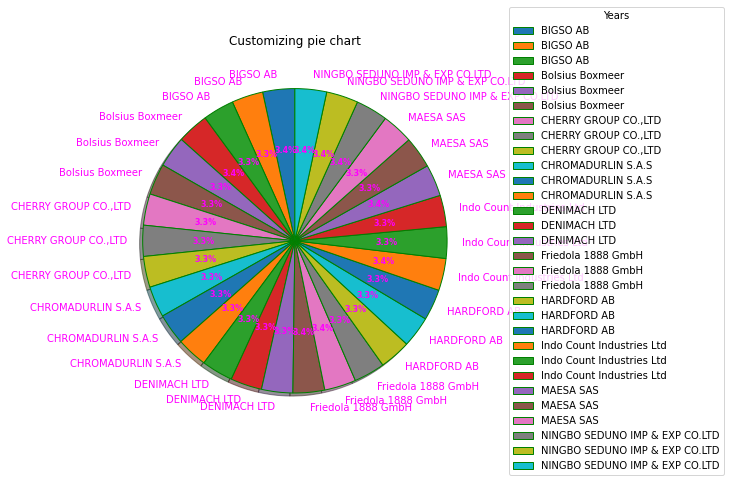

In [38]:
x = df.Supplier
y = df.Sales
# Creating explode data
#explode = (0.1, 0.07, 0.2, 0.2, 0.04, 0.08)

# Creating color parameters
#colors = ( "orange", "cyan", "brown","grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, y),
                                 # explode = explode,
                                  labels = x,
                                  shadow = True,
                                 # colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, x,
          title ="Years",
          loc ="center left",
          bbox_to_anchor =(1.05, 0, 0.8, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()

Text(0, 0.5, 'Total Sales in each month')

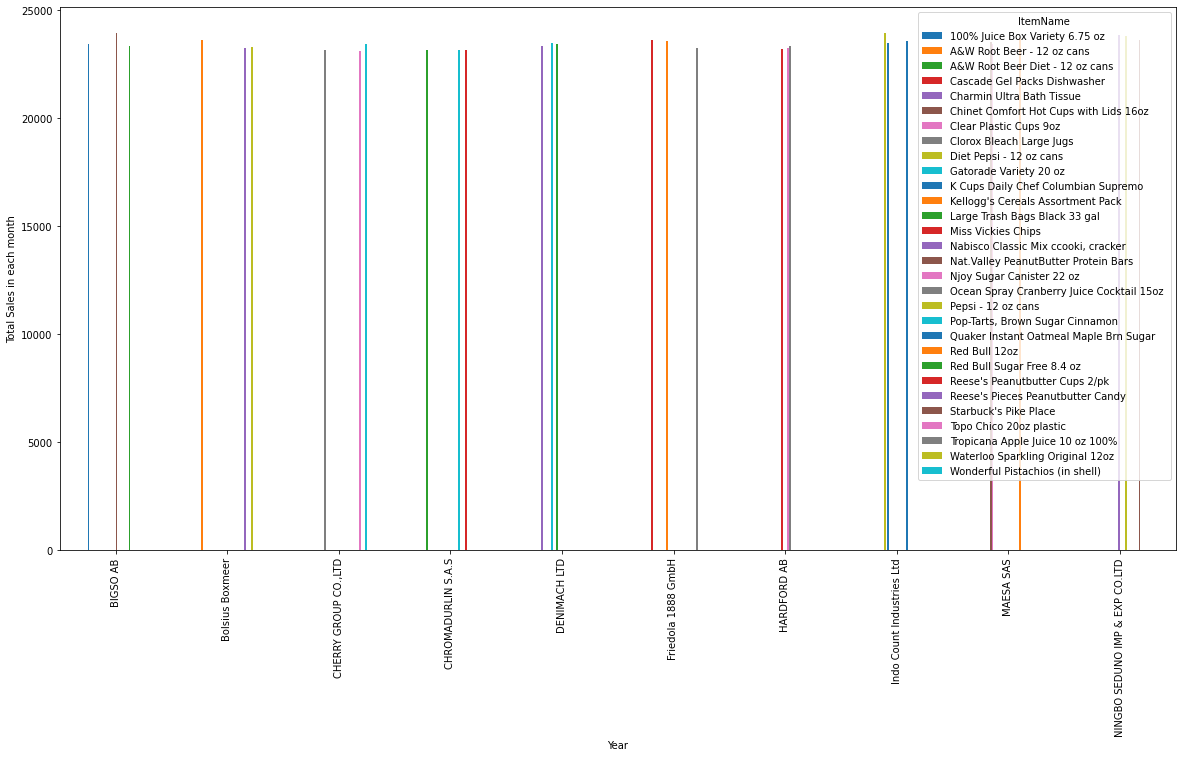

In [39]:
df_pivot = pd.pivot_table(df, values="Sales", index="Supplier", columns="ItemName")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 10)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each month")
